## 10986번
데이터의 $i$번째 원소부터 $j$번째 원소까지 합이 M으로 나누어 떨어지는 $(i, j)$ 쌍 개수를 구하시오.
- 입력)첫 줄에 데이터수와 M이 주어지고 다음 줄에 데이터가 입력된다.
  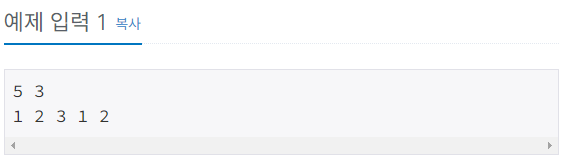
- 출력)$(i, j)$쌍 개수를 출력한다. 이때, $i \le j$이다.
  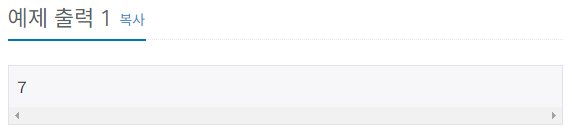
  <center>(7개의 $(i, j)$쌍은 (2,2), (0,1), (0,2), (0,4), (1,3), (2,4), (3,4)이다.)</center>
- https://www.acmicpc.net/problem/10986

### 방법
- 연속된 구간합(sum(data[i:j+1]))은 누적합 행렬의 차($S[j]-S[i-1]$)로 가능하며 $(S[j]-S[i-1]) \% M = 0$인 $(i, j)$를 찾는 것이 목표이다.<br>
  수식을 전개하면 $S[j]\%M = S[i-1]\%M$인, M으로 나눈 나머지가 같은 누적합 행렬 원소를 찾으면 된다.
- 위와 같은 수식으로 문제를 해결하고자 할때 $i=0$이면 오류가 남으로<br>
  0번째 원소부터 $j$번째 원소까지 합한 누적합 배열을 만들고 배열의 원소 중 M으로 나눈 나머지가 0인 개수를 세어야 한다.

In [ ]:
# 정의대로 구현하면 시간초과가 난다.
import sys

input = sys.stdin.readline
n, m = map(int, input().split())
data = list(map(int, input().split()))

count = 0
for x in range(n):
    s = 0
    for y in range(x, n):
        s += data[y]
        if s%m == 0:
            count += 1
print(count)

In [ ]:
# 단순히 누적합만 고려해 구현해도 시간초과 오류가 난다. 내장함수를 많이 사용해 일어난 문제같다.
import sys

input = sys.stdin.readline
n, m = map(int, input().split())
s, ssum = 0, []
for i in map(int, input().split()):
    s += i
    ssum.append(s%m)

c = ssum.count(0)
for i in range(m):
    r = ssum.count(i)
    if r >= 2:
        c +=  (r*(r-1))//2
print(c)

In [ ]:
# 116628 KB, 636 ms
import sys

input = sys.stdin.readline
n, m = map(int, input().split())
c = 0
s, rest = 0, [0]*m
for i in map(int, input().split()):
    s += i
    rest[s%m] += 1
    if s%m == 0:
        c += 1

for i in rest:
    if i >= 2:
        c += (i*(i-1)//2)
print(c)

In [ ]:
# 117652 KB, 532 ms
import sys

input = sys.stdin.readline
n, m = map(int, input().split())

# (이전 나머지 + 현재시점 데이터)%m = 이전 나머지 + (현재시점 데이터 % m)으로 누적합 후 나머지를 구할 수 있다. 
r, rest = 0, [0]*m
for i in map(int, input().split()):
    r = (r+i)%m
    rest[r] += 1

c = rest[0]
for i in rest:
    if i >= 2:
        c += (i*(i-1)//2)
print(c)